<a href="https://colab.research.google.com/github/AnchitSharma/Credit-Risk-Models-PD-LGD-EAD-Expected-Loss/blob/main/testing_autoregression_using_fred_data_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas_datareader as pdr
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [1]:
# import requests
# import pandas as pd

# # Define the URL and parameters for the FRED API
# url = "https://api.stlouisfed.org/fred/series/observations"
# params = {
#     "series_id": "HOUSTNSA",
#     "api_key": "7193ca0228dfc16fed31e661d7ef993a",  # Replace with your FRED API key
#     "file_type": "json",
#     "observation_start": "1959-01-01",
#     "observation_end": "2019-06-01"
# }

# # Make the request to the FRED API
# response = requests.get(url, params=params)
# print(response)
# data = response.json()

# # Convert the data to a pandas DataFrame
# observations = data["observations"]
# df = pd.DataFrame(observations)
# df["date"] = pd.to_datetime(df["date"])
# df.set_index("date", inplace=True)
# df["value"] = df["value"].astype(float)

# print(df.head())

<Response [200]>
           realtime_start realtime_end  value
date                                         
1959-01-01     2024-11-25   2024-11-25   96.2
1959-02-01     2024-11-25   2024-11-25   99.0
1959-03-01     2024-11-25   2024-11-25  127.7
1959-04-01     2024-11-25   2024-11-25  150.8
1959-05-01     2024-11-25   2024-11-25  152.5


In [3]:
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(16, 6))
sns.mpl.rc("font", size= 14)

In [5]:
data = df.copy()
data.head()

,realtime_start,realtime_end,value
date,,,
1959-01-01,2024-11-25,2024-11-25,96.2
1959-02-01,2024-11-25,2024-11-25,99.0
1959-03-01,2024-11-25,2024-11-25,127.7
1959-04-01,2024-11-25,2024-11-25,150.8
1959-05-01,2024-11-25,2024-11-25,152.5


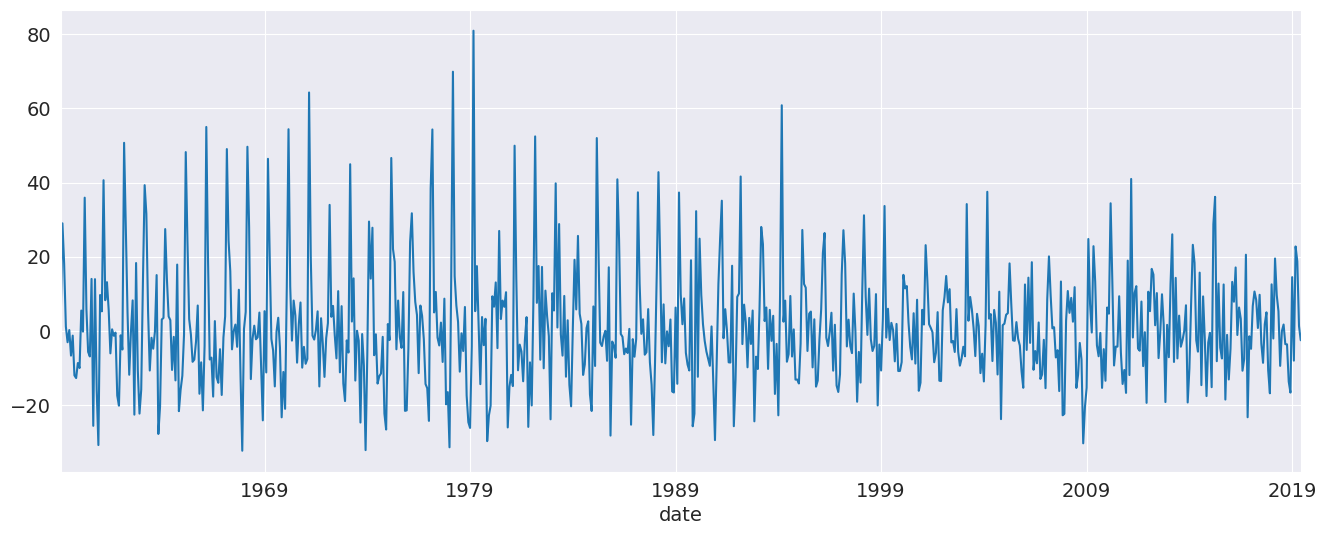

In [10]:
housing = data['value'].pct_change().dropna()
housing = 100*housing.asfreq('MS')
fig, ax = plt.subplots()
ax = housing.plot(ax=ax)

In [11]:
mod = AutoReg(housing, 3, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                  value   No. Observations:                  725
Model:                     AutoReg(3)   Log Likelihood               -2993.442
Method:               Conditional MLE   S.D. of innovations             15.289
Date:                Mon, 25 Nov 2024   AIC                           5996.884
Time:                        14:12:24   BIC                           6019.794
Sample:                    05-01-1959   HQIC                          6005.727
                         - 06-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1228      0.573      1.961      0.050       0.000       2.245
value.L1       0.1910      0.036      5.235      0.000       0.120       0.263
value.L2       0.0058      0.037      0.155      0.8

In [12]:
res = mod.fit(cov_type="HC0")
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                  value   No. Observations:                  725
Model:                     AutoReg(3)   Log Likelihood               -2993.442
Method:               Conditional MLE   S.D. of innovations             15.289
Date:                Mon, 25 Nov 2024   AIC                           5996.884
Time:                        14:15:13   BIC                           6019.794
Sample:                    05-01-1959   HQIC                          6005.727
                         - 06-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1228      0.601      1.869      0.062      -0.055       2.300
value.L1       0.1910      0.035      5.499      0.000       0.123       0.259
value.L2       0.0058      0.039      0.150      0.8

In [13]:
sel = ar_select_order(housing, 13, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                  value   No. Observations:                  725
Model:                    AutoReg(13)   Log Likelihood               -2676.157
Method:               Conditional MLE   S.D. of innovations             10.378
Date:                Mon, 25 Nov 2024   AIC                           5382.314
Time:                        14:16:57   BIC                           5450.835
Sample:                    03-01-1960   HQIC                          5408.781
                         - 06-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3615      0.458      2.970      0.003       0.463       2.260
value.L1      -0.2900      0.036     -8.161      0.000      -0.360      -0.220
value.L2      -0.0828      0.031     -2.652      0.0

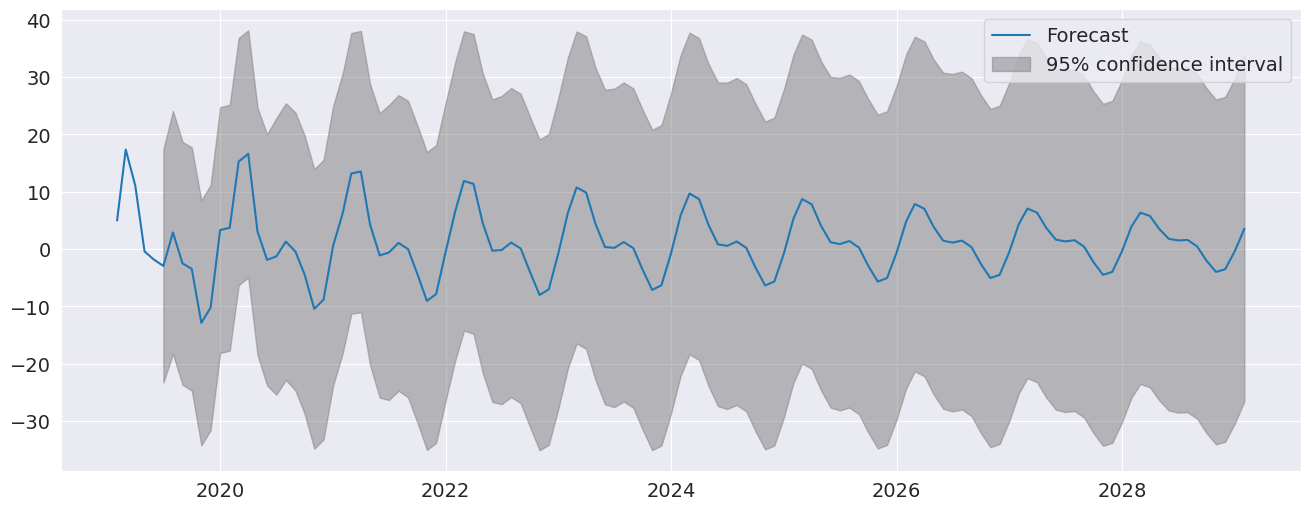

In [14]:
fig = res.plot_predict(720, 840)

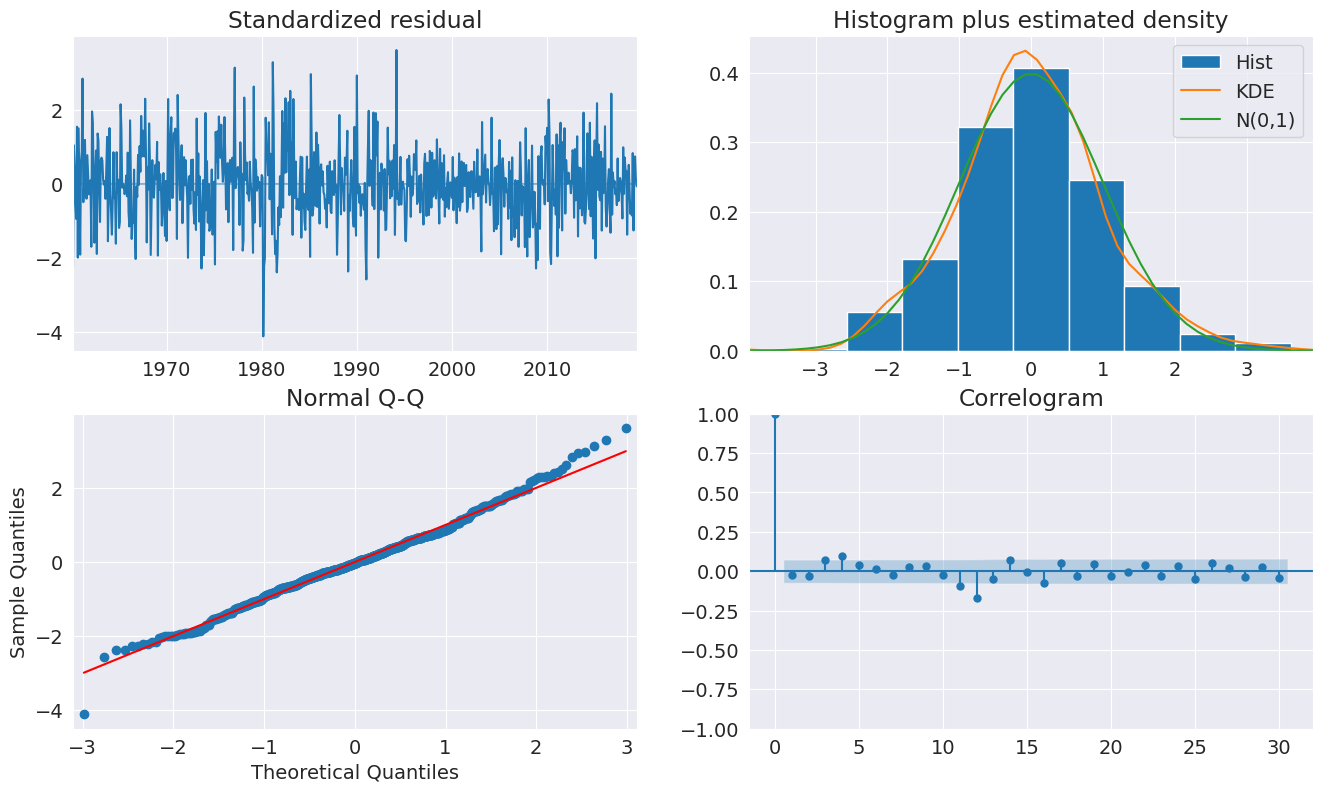

In [15]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags = 30)

In [16]:
sel = ar_select_order(housing, 13, seasonal=True, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                  value   No. Observations:                  725
Model:               Seas. AutoReg(2)   Log Likelihood               -2652.556
Method:               Conditional MLE   S.D. of innovations              9.487
Date:                Mon, 25 Nov 2024   AIC                           5335.112
Time:                        14:31:27   BIC                           5403.863
Sample:                    04-01-1959   HQIC                          5361.648
                         - 06-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2726      1.373      0.927      0.354      -1.418       3.963
s(2,12)       32.6477      1.824     17.901      0.000      29.073      36.222
s(3,12)       23.0685      2.435      9.472      0.0

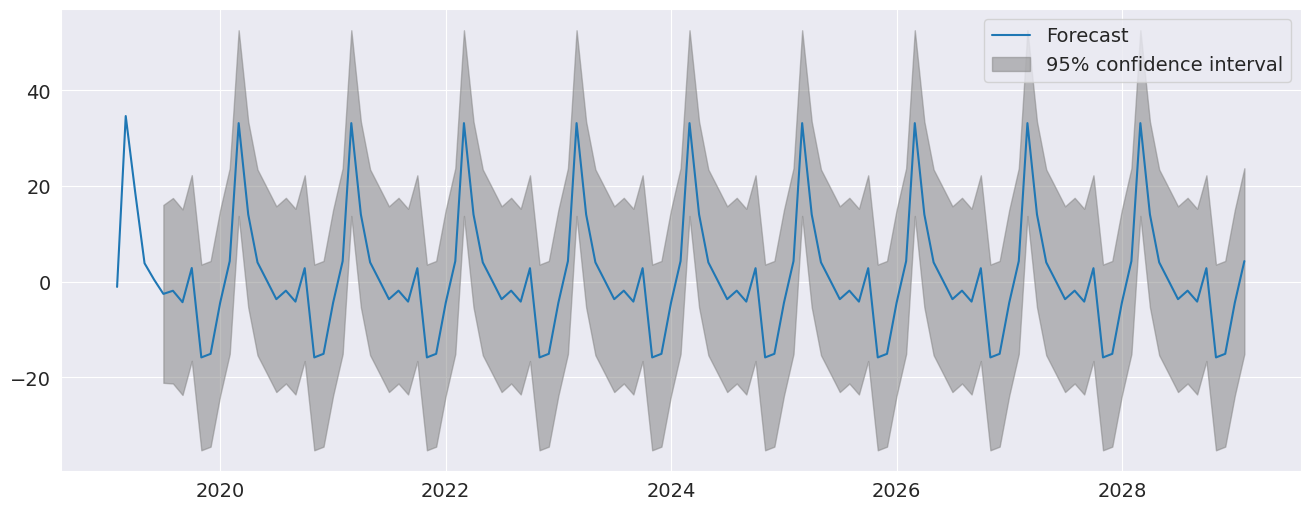

In [17]:
fig = res.plot_predict(720, 840)

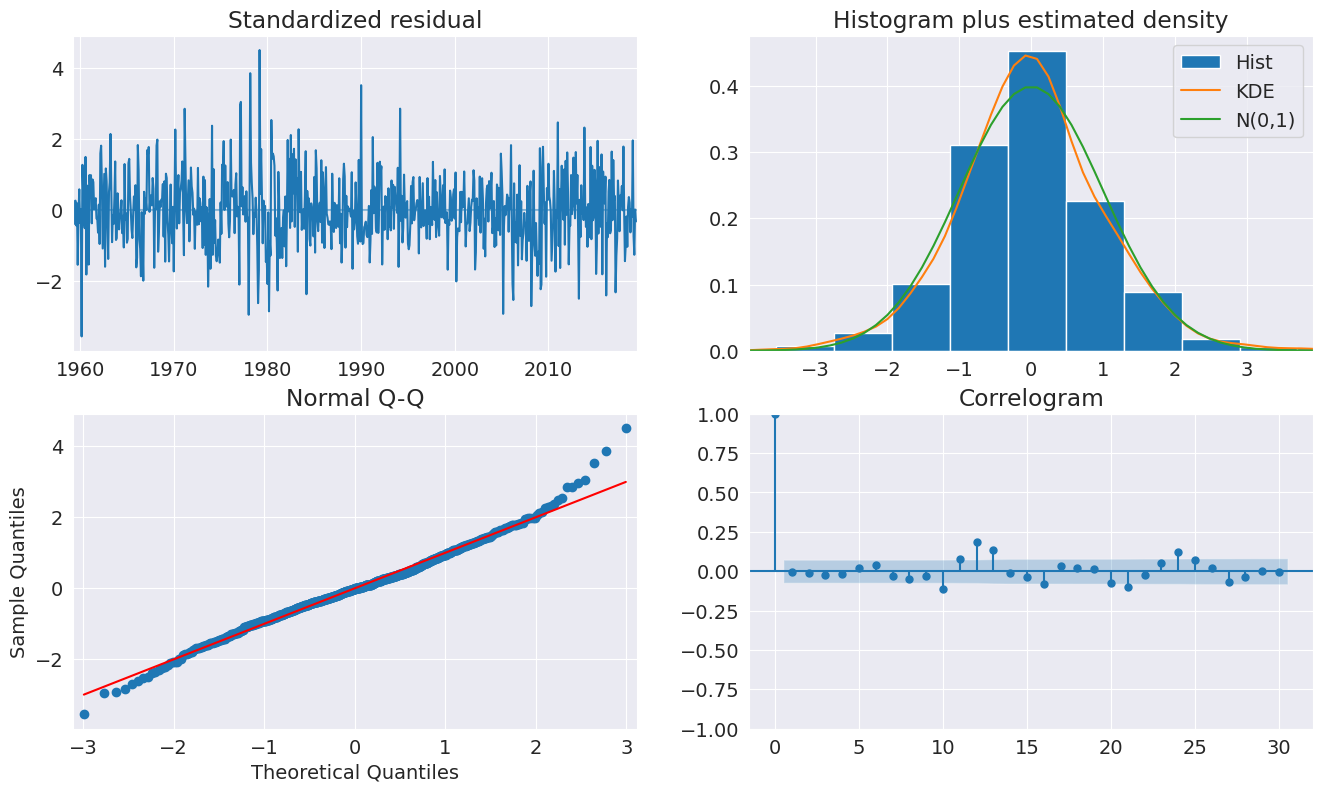

In [18]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(lags=30, fig=fig)

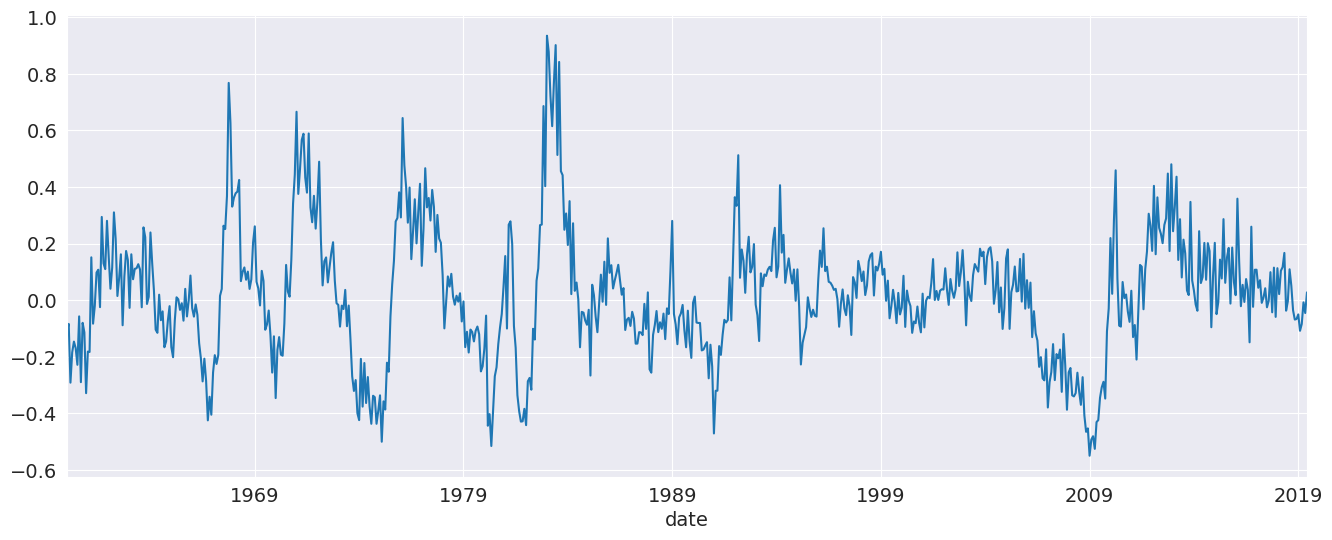

In [21]:
yoy_housing = data['value'].pct_change(12).resample("MS").last().dropna()
_, ax = plt.subplots()
ax = yoy_housing.plot(ax=ax)

In [22]:
sel = ar_select_order(yoy_housing, 13, glob=True, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                  value   No. Observations:                  714
Model:             Restr. AutoReg(13)   Log Likelihood                 589.177
Method:               Conditional MLE   S.D. of innovations              0.104
Date:                Mon, 25 Nov 2024   AIC                          -1162.353
Time:                        14:58:01   BIC                          -1125.933
Sample:                    02-01-1961   HQIC                         -1148.276
                         - 06-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0035      0.004      0.875      0.382      -0.004       0.011
value.L1       0.5640      0.035     16.167      0.000       0.496       0.632
value.L2       0.2347      0.038      6.238      0.0

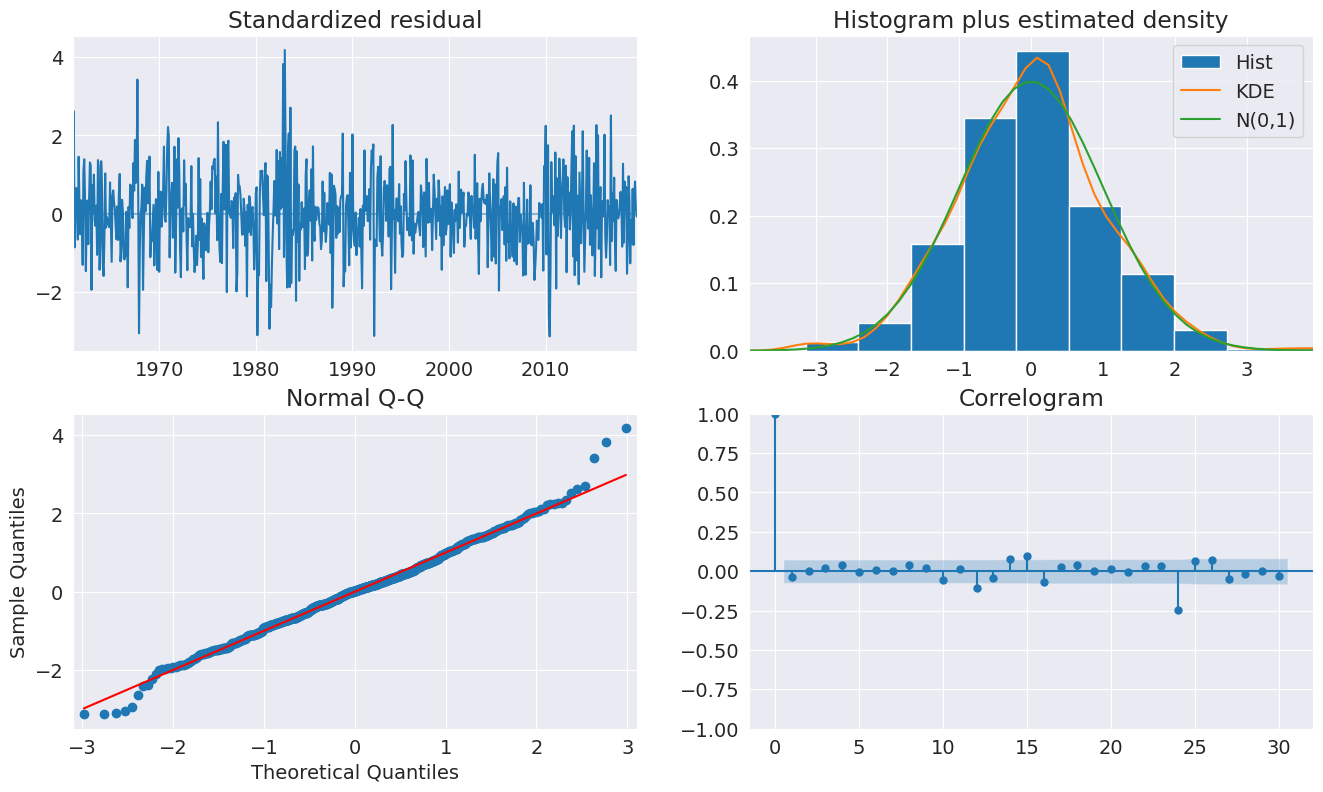

In [23]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [24]:
# include dummies, these are all insignificant since the model is using year-over year changes
sel = ar_select_order(yoy_housing, 13, glob=True, seasonal=True, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                               AutoReg Model Results                                
Dep. Variable:                        value   No. Observations:                  714
Model:             Restr. Seas. AutoReg(13)   Log Likelihood                 590.875
Method:                     Conditional MLE   S.D. of innovations              0.104
Date:                      Mon, 25 Nov 2024   AIC                          -1143.751
Time:                              15:08:07   BIC                          -1057.253
Sample:                          02-01-1961   HQIC                         -1110.317
                               - 06-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0167      0.014      1.215      0.224      -0.010       0.044
s(2,12)       -0.0179      0.019     -0.931      0.352      -0.056       0.020
s(3,

In [ ]:
# industrial production data index data to examine forecasting
